In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

In [35]:
import warnings 
warnings.filterwarnings("ignore")

df = pd.read_csv("sonar_dataset.csv", header=None)
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
133,0.0790,0.0707,0.0352,0.1660,0.1330,0.0226,0.0771,0.2678,0.5664,0.6609,...,0.0298,0.0390,0.0294,0.0175,0.0249,0.0141,0.0073,0.0025,0.0101,M
90,0.0126,0.0519,0.0621,0.0518,0.1072,0.2587,0.2304,0.2067,0.3416,0.4284,...,0.0208,0.0048,0.0199,0.0126,0.0022,0.0037,0.0034,0.0114,0.0077,R
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
159,0.0235,0.0220,0.0167,0.0516,0.0746,0.1121,0.1258,0.1717,0.3074,0.3199,...,0.0221,0.0152,0.0083,0.0058,0.0023,0.0057,0.0052,0.0027,0.0021,M
88,0.0274,0.0242,0.0621,0.0560,0.1129,0.0973,0.1823,0.1745,0.1440,0.1808,...,0.0113,0.0108,0.0085,0.0047,0.0074,0.0104,0.0161,0.0220,0.0173,R


In [36]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [37]:
df.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60],
      dtype='int64')

In [38]:
df[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [74]:
X = df.drop(60, axis="columns")
y = df[60]

In [75]:
y.head()

0    R
1    R
2    R
3    R
4    R
Name: 60, dtype: object

In [79]:
y = pd.get_dummies(y, drop_first=True)
y = y.replace({True: 1, False: 0})

In [80]:
y.value_counts()

R
0    111
1     97
Name: count, dtype: int64

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [103]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    # keras.layers.Input(shape=(60,)),
    keras.layers.Dense(60, input_dim=60, activation="relu"),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(15, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid"),
])

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"],
             )

In [104]:
model.fit(X, y, epochs=100, batch_size=8)

Epoch 1/100
26/26 [==============================] - 0s 718us/step - loss: 0.6939 - accuracy: 0.5144
Epoch 2/100
26/26 [==============================] - 0s 678us/step - loss: 0.6667 - accuracy: 0.5673
Epoch 3/100
26/26 [==============================] - 0s 678us/step - loss: 0.6412 - accuracy: 0.6394
Epoch 4/100
26/26 [==============================] - 0s 678us/step - loss: 0.6119 - accuracy: 0.6731
Epoch 5/100
26/26 [==============================] - 0s 718us/step - loss: 0.5752 - accuracy: 0.6971
Epoch 6/100
26/26 [==============================] - 0s 699us/step - loss: 0.5432 - accuracy: 0.7452
Epoch 7/100
26/26 [==============================] - 0s 798us/step - loss: 0.5053 - accuracy: 0.7933
Epoch 8/100
26/26 [==============================] - 0s 758us/step - loss: 0.4745 - accuracy: 0.7788
Epoch 9/100
26/26 [==============================] - 0s 1ms/step - loss: 0.4628 - accuracy: 0.7788
Epoch 10/100
26/26 [==============================] - 0s 798us/step - loss: 0.4291 - accuracy

In [94]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000


[0.0011625560000538826, 1.0]

In [90]:
y_pred = model.predict(X_test).reshape(-1)
print(y_pred[:10])

# round the values to nearest integer ie 0 or 1
y_pred = np.round(y_pred)
print(y_pred[:10])

2/2 [==============================] - 0s 2ms/step
[1.2072444e-07 9.8263694e-04 5.2872067e-04 6.8667682e-06 9.9999994e-01
 9.9999833e-01 1.6703746e-04 1.0000000e+00 4.9181922e-06 1.0000000e+00]
[0. 0. 0. 0. 1. 1. 0. 1. 0. 1.]


In [91]:
y_test[:10]

,R
186,0
155,0
165,0
200,0
58,1
34,1
151,0
18,1
202,0
62,1


In [96]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        25

    accuracy                           1.00        52
   macro avg       1.00      1.00      1.00        52
weighted avg       1.00      1.00      1.00        52



Text(95.72222222222221, 0.5, 'Truth')

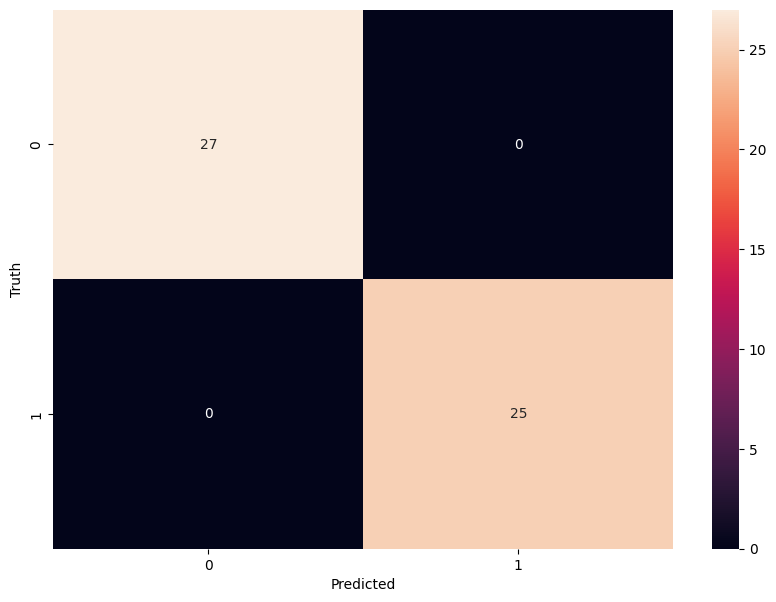

In [99]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [105]:
model1 = keras.models.Sequential([
    # keras.layers.Input(shape=(60,)),
    keras.layers.Dense(60, input_dim=60, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation="sigmoid"),
])

model1.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"],
             )

In [108]:
model1.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
20/20 [==============================] - 0s 840us/step - loss: 0.4129 - accuracy: 0.8205
Epoch 2/100
20/20 [==============================] - 0s 892us/step - loss: 0.4932 - accuracy: 0.8013
Epoch 3/100
20/20 [==============================] - 0s 840us/step - loss: 0.4448 - accuracy: 0.7628
Epoch 4/100
20/20 [==============================] - 0s 840us/step - loss: 0.3807 - accuracy: 0.8269
Epoch 5/100
20/20 [==============================] - 0s 840us/step - loss: 0.3978 - accuracy: 0.8526
Epoch 6/100
20/20 [==============================] - 0s 840us/step - loss: 0.4714 - accuracy: 0.8141
Epoch 7/100
20/20 [==============================] - 0s 892us/step - loss: 0.4316 - accuracy: 0.7949
Epoch 8/100
20/20 [==============================] - 0s 892us/step - loss: 0.3939 - accuracy: 0.8846
Epoch 9/100
20/20 [==============================] - 0s 840us/step - loss: 0.3932 - accuracy: 0.8397
Epoch 10/100
20/20 [==============================] - 0s 840us/step - loss: 0.3964 - accura

In [109]:
model1.evaluate(X_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.5533 - accuracy: 0.7692


[0.5532640814781189, 0.7692307829856873]

In [111]:
y_pred = model1.predict(X_test).reshape(-1)
print(y_pred[:10])

# round the values to nearest integer ie 0 or 1
y_pred = np.round(y_pred)
print(y_pred[:10])

2/2 [==============================] - 0s 2ms/step
[1.6707561e-07 9.0876043e-01 9.3864328e-01 4.9752728e-03 9.9999988e-01
 9.9438113e-01 6.5317625e-01 1.0000000e+00 5.8731337e-05 1.0000000e+00]
[0. 1. 1. 0. 1. 1. 1. 1. 0. 1.]


In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79        27
           1       0.81      0.68      0.74        25

    accuracy                           0.77        52
   macro avg       0.78      0.77      0.77        52
weighted avg       0.77      0.77      0.77        52



Text(95.72222222222221, 0.5, 'Truth')

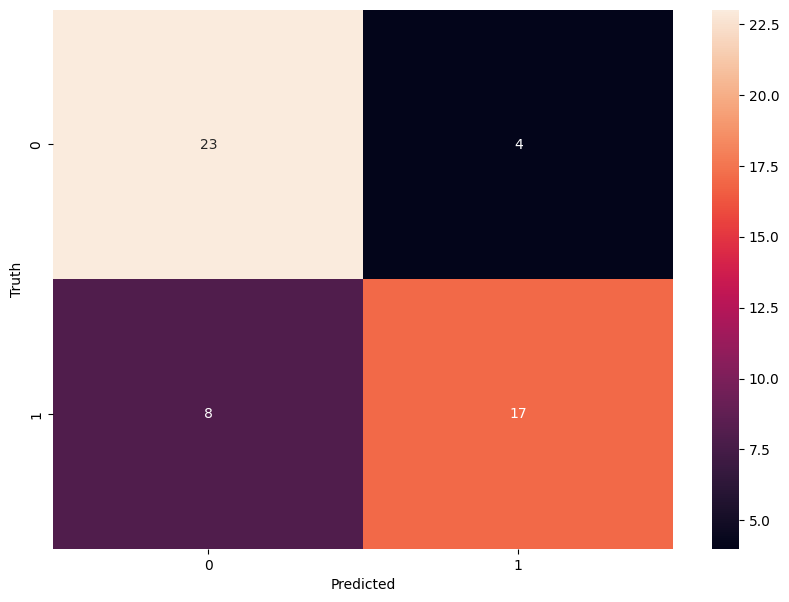

In [113]:

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')